In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
PATH_LH_MNIST = 'Loss_MNIST.txt'
PATH_LH_Fashion = 'Loss_Fashion.txt'

def data_read(PATH):
  textfile = open(PATH, 'r')
  data = np.array([])
  for line in textfile:
    a = np.array([float(v) for v in line.strip().split(" ")])
    data = np.append(data, a)
  return data

Loss_history_MNIST = data_read(PATH_LH_MNIST).reshape(2,5,200)
Loss_history_Fashion = data_read(PATH_LH_Fashion).reshape(2,5,200)
Loss_history_MNIST = np.array(Loss_history_MNIST)
Loss_history_Fashion = np.array(Loss_history_Fashion)
Loss_history_MNIST_NQE_mean, Loss_history_MNIST_NQE_std = Loss_history_MNIST[0].mean(axis=0), Loss_history_MNIST[0].std(axis=0)
Loss_history_MNIST_TQE_mean, Loss_history_MNIST_TQE_std = Loss_history_MNIST[1].mean(axis=0), Loss_history_MNIST[1].std(axis=0)
Loss_history_Fashion_NQE_mean, Loss_history_Fashion_NQE_std = Loss_history_Fashion[0].mean(axis=0), Loss_history_Fashion[0].std(axis=0)
Loss_history_Fashion_TQE_mean, Loss_history_Fashion_TQE_std = Loss_history_Fashion[1].mean(axis=0), Loss_history_Fashion[1].std(axis=0)

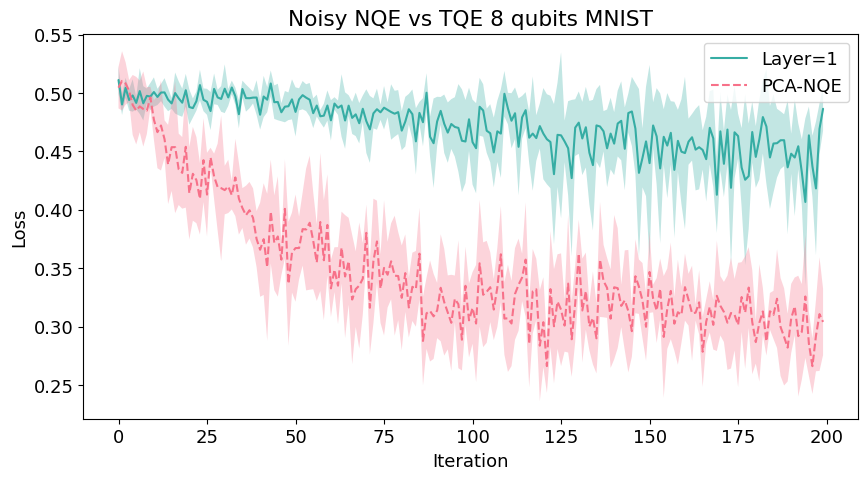

In [8]:
import seaborn as sns
n = 1
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 2)
with sns.axes_style("darkgrid"):
    
    ax.plot(np.array(range(len(Loss_history_MNIST_TQE_mean[::n]))) * n, Loss_history_MNIST_TQE_mean[::n], linewidth=1.5, label="Layer=1", c=clrs[1], linestyle='solid')
    ax.fill_between(np.array(range(len(Loss_history_MNIST_TQE_mean[::n]))) * n, Loss_history_MNIST_TQE_mean[::n]-Loss_history_MNIST_TQE_std[::n], Loss_history_MNIST_TQE_mean[::n]+Loss_history_MNIST_TQE_std[::n], alpha=0.3,facecolor=clrs[1])

    ax.plot(np.array(range(len(Loss_history_MNIST_NQE_mean[::n]))) * n, Loss_history_MNIST_NQE_mean[::n], linewidth=1.5, label="PCA-NQE", c=clrs[0], linestyle='dashed')
    ax.fill_between(np.array(range(len(Loss_history_MNIST_NQE_mean[::n]))) * n, Loss_history_MNIST_NQE_mean[::n]-Loss_history_MNIST_NQE_std[::n], Loss_history_MNIST_NQE_mean[::n]+Loss_history_MNIST_NQE_std[::n], alpha=0.3,facecolor=clrs[0])

    
    
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_title("Noisy NQE vs TQE 8 qubits MNIST")
ax.legend(fontsize=13)
plt.savefig("Noisy NQE vs TQE 8 qubits MNIST.pdf")

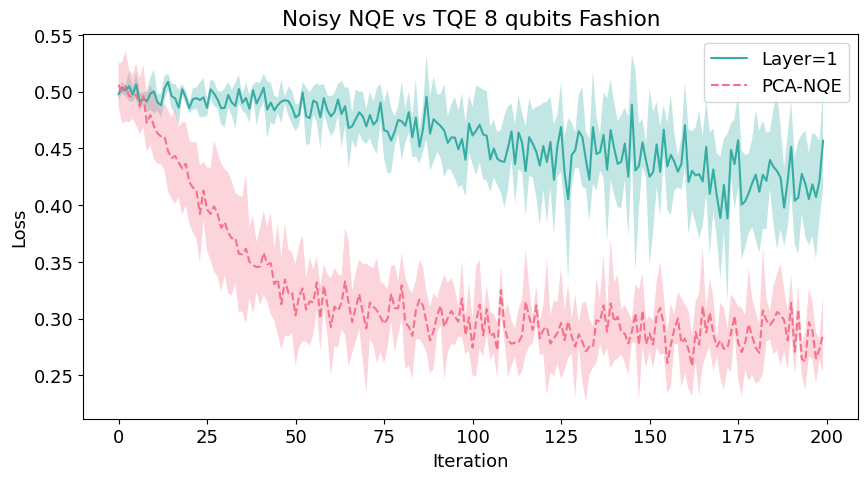

In [9]:
import seaborn as sns
n = 1
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 2)
with sns.axes_style("darkgrid"):
    
    ax.plot(np.array(range(len(Loss_history_Fashion_TQE_mean[::n]))) * n, Loss_history_Fashion_TQE_mean[::n], linewidth=1.5, label="Layer=1", c=clrs[1], linestyle='solid')
    ax.fill_between(np.array(range(len(Loss_history_Fashion_TQE_mean[::n]))) * n, Loss_history_Fashion_TQE_mean[::n]-Loss_history_Fashion_TQE_std[::n], Loss_history_Fashion_TQE_mean[::n]+Loss_history_Fashion_TQE_std[::n], alpha=0.3,facecolor=clrs[1])

    ax.plot(np.array(range(len(Loss_history_Fashion_NQE_mean[::n]))) * n, Loss_history_Fashion_NQE_mean[::n], linewidth=1.5, label="PCA-NQE", c=clrs[0], linestyle='dashed')
    ax.fill_between(np.array(range(len(Loss_history_Fashion_NQE_mean[::n]))) * n, Loss_history_Fashion_NQE_mean[::n]-Loss_history_Fashion_NQE_std[::n], Loss_history_Fashion_NQE_mean[::n]+Loss_history_Fashion_NQE_std[::n], alpha=0.3,facecolor=clrs[0])

    
    
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_title("Noisy NQE vs TQE 8 qubits Fashion")
ax.legend(fontsize=13)
plt.savefig("Noisy NQE vs TQE 8 qubits Fashion.pdf")

In [18]:
acc_MNIST_NQE = np.array([0.9744680851063829, 0.9560283687943263, 0.9626477541371158, 0.948936170212766, 0.9527186761229315])
acc_MNIST_TQE = np.array([0.6520094562647755, 0.6321513002364066, 0.6122931442080378, 0.6151300236406619, 0.649645390070922])
acc_Fashion_NQE = np.array([0.943, 0.947, 0.94, 0.9105, 0.912])
acc_Fashion_TQE = np.array([0.612, 0.6375, 0.724, 0.669, 0.7035])
print(f"Accuracy MNIST NQE: {acc_MNIST_NQE.mean()} \pm {acc_MNIST_NQE.std()}")
print(f"Accuracy MNIST TQE: {acc_MNIST_TQE.mean()} \pm {acc_MNIST_TQE.std()}")
print(f"Accuracy Fashion NQE: {acc_Fashion_NQE.mean()} \pm {acc_Fashion_NQE.std()}")
print(f"Accuracy Fashion TQE: {acc_Fashion_TQE.mean()} \pm {acc_Fashion_TQE.std()}")

Accuracy MNIST NQE: 0.9589598108747046 \pm 0.00896800962233844
Accuracy MNIST TQE: 0.6322458628841607 \pm 0.016639801965824423
Accuracy Fashion NQE: 0.9305 \pm 0.015880806024884227
Accuracy Fashion TQE: 0.6692 \pm 0.041124931610885394


In [2]:
from pennylane import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/tak/Github/QEmbedding/')
import torch
from torch import nn
import pennylane as qml
import embedding
import data
feature_reduction = 'PCA8'
classes = [0,1]
data_type = 'mnist'
X_train, X_test, Y_train, Y_test = data.data_load_and_process(data_type, feature_reduction=feature_reduction, classes=classes)
Y_train = [-1 if y == 0 else 1 for y in Y_train]
Y_test = [-1 if y == 0 else 1 for y in Y_test]

In [4]:
print(len(X_train), len(X_test))

12665 2115


In [5]:
data_type = 'fashion'
X_train, X_test, Y_train, Y_test = data.data_load_and_process(data_type, feature_reduction=feature_reduction, classes=classes)
Y_train = [-1 if y == 0 else 1 for y in Y_train]
Y_test = [-1 if y == 0 else 1 for y in Y_test]

In [6]:
print(len(X_train), len(X_test))

12000 2000
